In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
autism = pd.read_csv('train.csv')

In [43]:
autism.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [44]:
autism.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

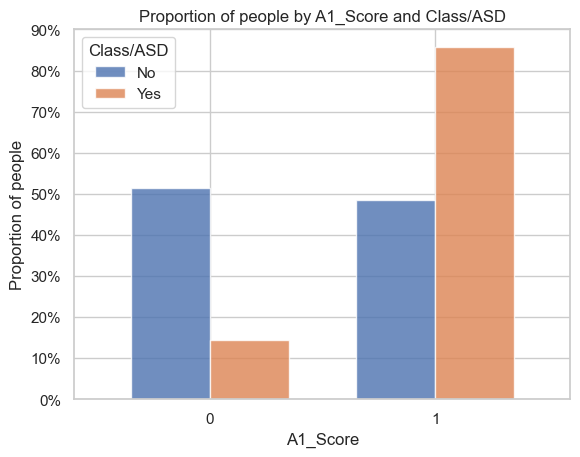

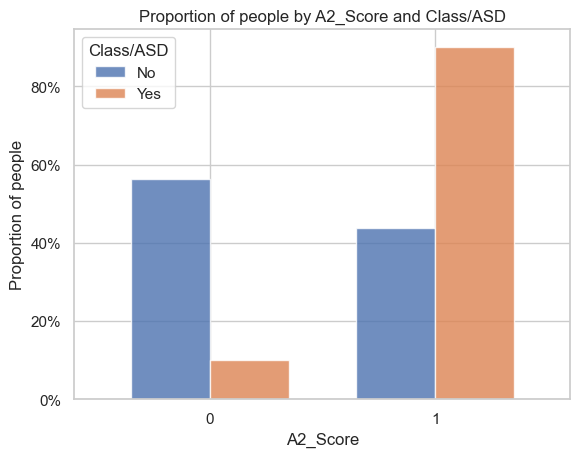

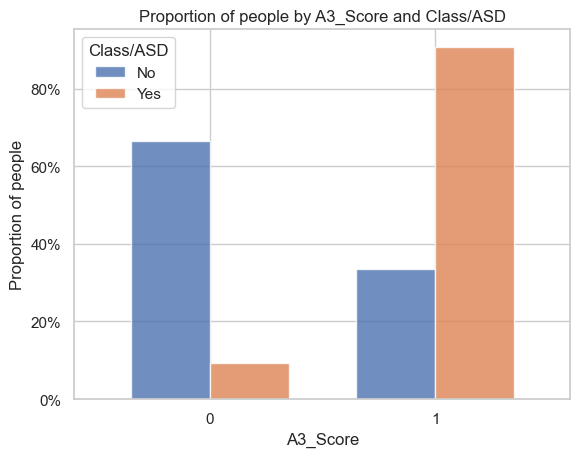

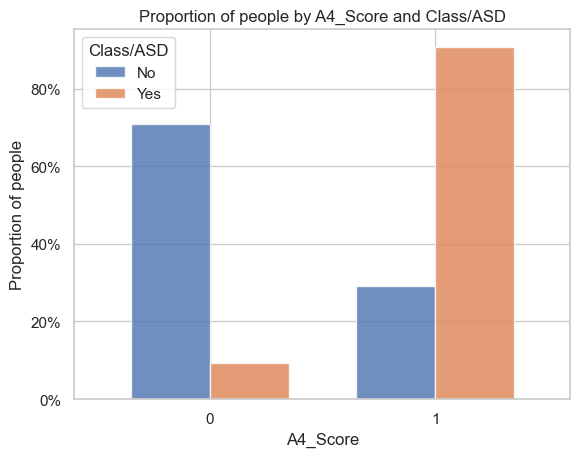

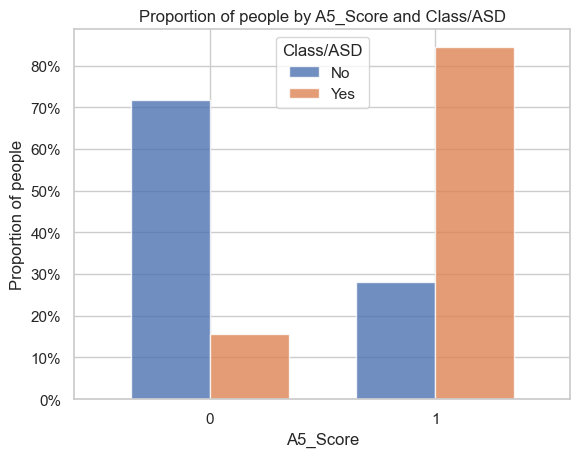

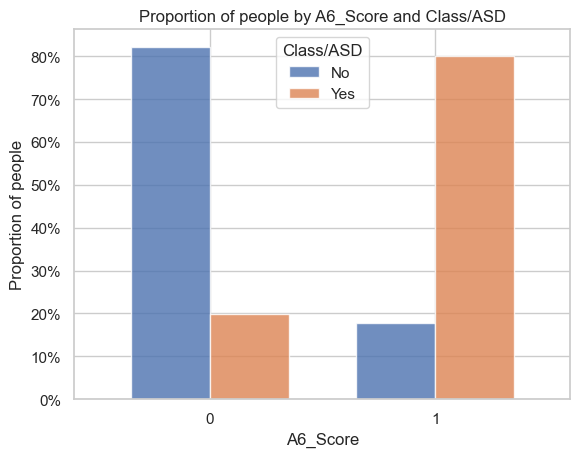

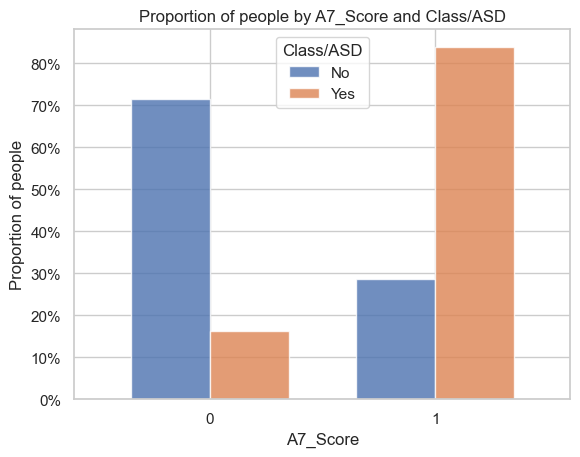

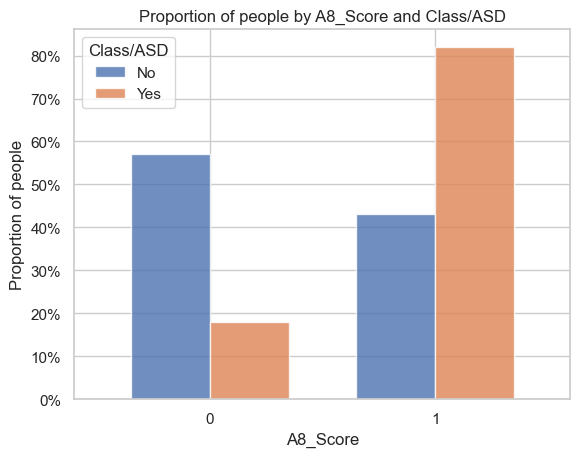

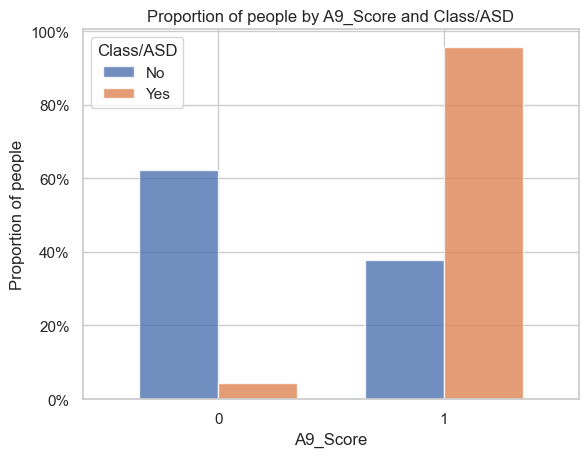

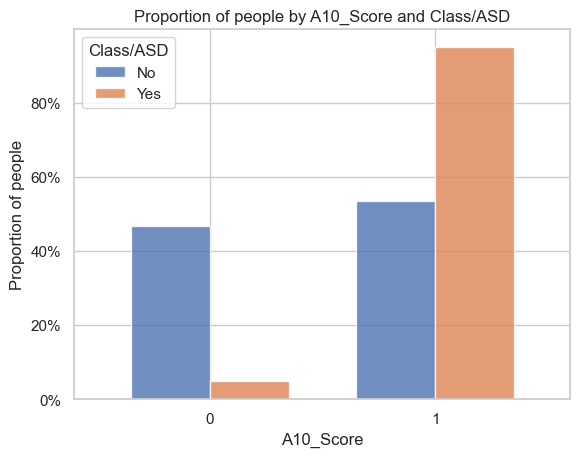

In [92]:
lists = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']
for i in lists:

    proportions = autism.groupby([i, 'Class/ASD']).size().reset_index(name='counts')
    proportions['proportions'] = proportions.groupby('Class/ASD')['counts'].apply(lambda x: x / x.sum())
    
    pivoted = proportions.pivot(index=i, columns='Class/ASD', values='proportions')

    ax = pivoted.plot.bar(width=0.7, alpha=0.8)
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion of people')
    ax.set_title('Proportion of people by ' + i + ' and Class/ASD')
    ax.legend(['No','Yes'],title='Class/ASD')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

<AxesSubplot:xlabel='age', ylabel='Density'>

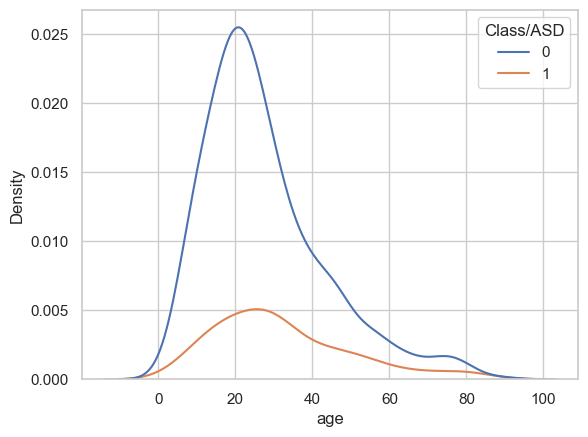

In [86]:
sns.kdeplot(data=autism, x="age", hue="Class/ASD")

<AxesSubplot:xlabel='gender', ylabel='count'>

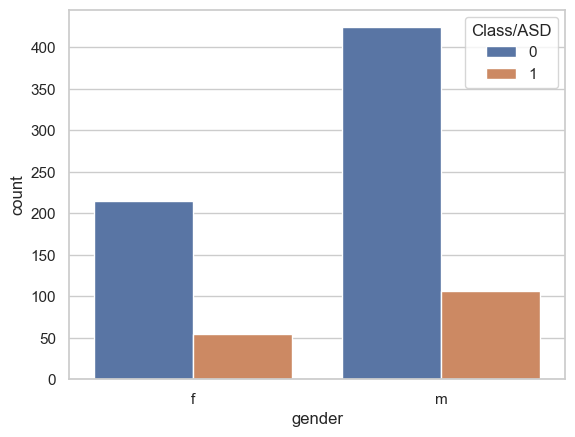

In [94]:
sns.countplot(data=autism, x='gender', hue='Class/ASD')

Text(0, 0.5, 'Frequency')

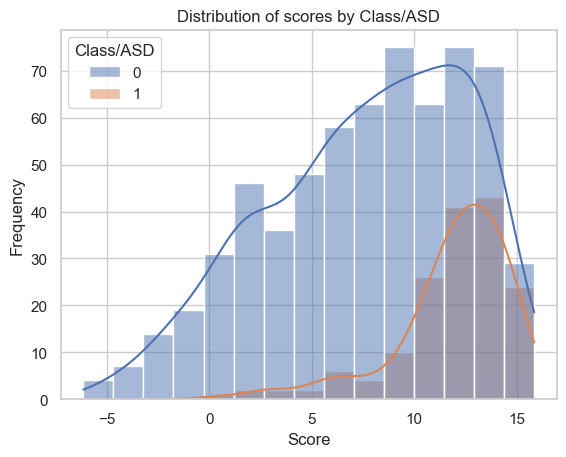

In [99]:
sns.histplot(data=autism, x="result", hue="Class/ASD", kde=True)

# add title and axis labels
plt.title("Distribution of scores by Class/ASD")
plt.xlabel("Score")
plt.ylabel("Frequency")